# <font color = LightGreen > **CA model of water dynamics and hydrophobic interactions** </font>

Authors:
- H. Malash, 15179192
- S. Bhusal, 14724383
- L. Pahladsingh, 13846566
- T. Glansdorp, 12748587

In [1]:
from model import CA_rules, CA_grid, CA_rules_only_water
# import model
import analysis
import numpy as np
import matplotlib.pyplot as plt
import random

## <font color = LightBlue > **Background Information** </font>

Our cellular automaton (CA) model simulating an aqueous solution consists of a grid, representing the surface of a torus. Each cell, denoted as '$\textit{i}$' is surrounded by four neighbors '$\textit{j}$ ', and there is an additional cell two positions beyond '$\textit{i}$ ', labeled as '$\textit{k}$ '. We interpret the cell indicated by 'j' as the von Neumann neighborhood, and the cell indicated by 'k' as the extended von Neumann neighborhood.

The state of each cell, represented by binary numbers, signifies its occupancy. There are three possible options for occupancy within the system:

- An empty cell is denoted by 0.
- A cell containing water is indicated by 1.
- A cell containing solute is indicated by 2.

In our model, two parameters influence the movement of molecules within the grid: the $\textbf{breaking probability}$ ($P_B$) and the $\textbf{joining probability}$ ($J$). The combination of these probabilities determines the behavior of cell movement.

The $\textbf{breaking probability}$ ($P_B$) represents the probability of a molecule in cell $\textit{i}$ breaking away from a molecule in cell $\textit{j}$ when only one $\textit{j}$ cell is occupied. We have defined three specific breaking probabilities:

- $P_B(W)$: Water-water breaking probability
- $P_B(L)$: Solute-solute breaking probability
- $P_B(WL)$: Water-solute breaking probability

The  $\textbf{joining probability}$ ($J$) quantifies the ratio between the likelihood of a molecule at $\textit{i}$  moving towards an occupied $\textit{k}$ cell when $\textit{j}$  is empty and the probability of the same molecule at $\textit{i}$  moving towards an empty $\textit{k}$  cell when $\textit{j}$  is unoccupied. 

 is a positive number, when ($J=1$), it indicated that a molecule at $\textit{i}$ has the same probability to move towards an occupied $\textit{k}$ as when $\textit{k}$ is empty. So the state of cell $\textit{k}$ does not matter. 

The parameter ($J$) is a positive number. When $J=1$, it signifies that a molecule at $\textit{i}$ has an equal probability of moving towards an occupied $\textit{k}$ as when $\textit{k}$ is empty. In this case, the state of cell $\textit{k}$ does not influence the movement probability. As before we have three distinct joining probabilities: $J(W)$, $J(L)$ and $J(WL)$.

### <font> **Moving probability** </font> 
Combining $P_B$ and $J$, we obtaining the moving probability of a cell $p_m$: </br>
$p_m$ = sum of $p_m(d)$ over all possible $\textit{d}$ if the sum <1,
else 1 </br>

with

$p_m(d) = 1 / (1 + ((4-n)/(P_B^n) - 1) / J(d)) $ </br>
if n < 4 and $P_B$ > 0  </br>

$\textit{n}$ indicating the number of occupied $\textit{j}$ cells, there are $4-n$ directions for $\textit{i}$ to move. 

In the case where $J=1$, the moving probability ($p_m$) is equal to $P_B^n$. Given that all our research accepts this condition, we will focus on working with joint probabilities involving only $P_B$ to calculate the moving probability of a molecule.

$\textit{Information mainly based on}$: </br>
Kier, L. B., & Cheng, C. K. (1994). A Cellular Automata Model of an Aqueous Solution, Journal of Chemical Information and Computer Science.  34, 1334-1337


## <font color = LightBlue > **Water Grid** </font>

## <font color = LightBlue > **Water-Solute Grid** </font>

### <font color = Pink > **Influence of Water temperature on solubility** </font>

### <font color = Pink > **Influence of Solute Concentration** </font>

In [2]:
from analysis import calculate_attributes

solute_concentrations = [0, 50] #, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900]
results = []
for solute_amount in solute_concentrations:
    print(f"Running simulation with {solute_amount} solute molecules.")
    ca_grid = CA_grid(solute_amount=solute_amount)
    ca_rules = CA_rules(ca_grid)
    final_grid = ca_rules.generate_simulation()

    f_o, f_1, f_2, f_3, f_4 = calculate_attributes(grid=ca_grid, rules=ca_rules)
    output = np.array([f_o, f_1, f_2, f_3, f_4])
    results.append(output)

results = np.array(results)
print(results)


Running simulation with 0 solute molecules.
Running simulation with 50 solute molecules.
[[0.     0.0165 0.1215 0.3635 0.4985]
 [0.0025 0.029  0.132  0.37   0.4415]]


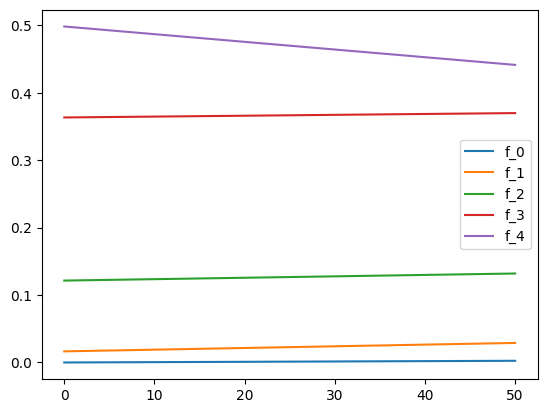

In [3]:

plt.plot(solute_concentrations, results.T[0], label='f_0')
plt.plot(solute_concentrations, results.T[1], label='f_1')
plt.plot(solute_concentrations, results.T[2], label='f_2')
plt.plot(solute_concentrations, results.T[3], label='f_3')
plt.plot(solute_concentrations, results.T[4], label='f_4')
plt.legend()
plt.show()

### <font color = Pink > **Influence of Water-Solute Breaking Probability** </font>

### Counting of unbound water molecules

In [3]:
unbound_water_count = []

for pbw in np.arange(0, 1, 0.1):
    final_grid = CA_rules_only_water(CA_grid(), pbw).generate_simulation()
    total_height = 55
    total_width = 55
    print(pbw)

    unbound_water = analysis.count_unbound_water(final_grid, total_height, total_width)

    unbound_water_count.append(unbound_water)

print(unbound_water_count)


This is iteration 1 of the simulation
This is iteration 2 of the simulation
This is iteration 3 of the simulation
This is iteration 4 of the simulation
This is iteration 5 of the simulation
This is iteration 6 of the simulation
This is iteration 7 of the simulation
This is iteration 8 of the simulation
This is iteration 9 of the simulation
This is iteration 10 of the simulation
This is iteration 11 of the simulation
This is iteration 12 of the simulation
This is iteration 13 of the simulation
This is iteration 14 of the simulation
This is iteration 15 of the simulation
This is iteration 16 of the simulation
This is iteration 17 of the simulation
This is iteration 18 of the simulation
This is iteration 19 of the simulation
This is iteration 20 of the simulation
This is iteration 21 of the simulation
This is iteration 22 of the simulation
This is iteration 23 of the simulation
This is iteration 24 of the simulation
This is iteration 25 of the simulation
This is iteration 26 of the simula